<a href="https://colab.research.google.com/github/kf-rahman/UW-stat_courses/blob/main/Stat444_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
install.packages("GGally")
install.packages("ggplot2")
install.packages("gridExtra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
install.packages(c("glmnet", "mgcv", "rpart", "randomForest"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’




In [9]:
library(ggplot2)
library(GGally)
library(readr)   # For creating pair plots
library(gridExtra)


In [10]:
# Replace 'path_to_your_csv_file/ozone_data.csv' with the actual path to your CSV file
ozone_data <- read.csv("/content/stat444-data.csv")


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


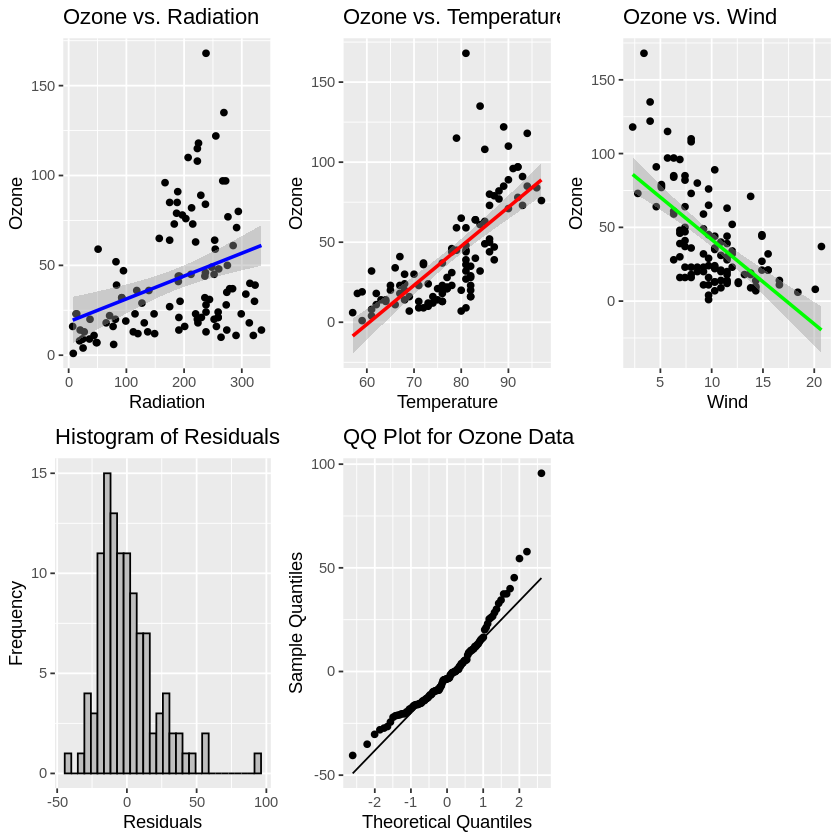

In [11]:
model <- lm(ozone ~ radiation + temperature + wind, data = ozone_data)

p1 <- ggplot(ozone_data, aes(x = radiation, y = ozone)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  ggtitle("Ozone vs. Radiation") +
  xlab("Radiation") +
  ylab("Ozone")

p2 <- ggplot(ozone_data, aes(x = temperature, y = ozone)) +
  geom_point() +
  geom_smooth(method = "lm", col = "red") +
  ggtitle("Ozone vs. Temperature") +
  xlab("Temperature") +
  ylab("Ozone")

p3 <- ggplot(ozone_data, aes(x = wind, y = ozone)) +
  geom_point() +
  geom_smooth(method = "lm", col = "green") +
  ggtitle("Ozone vs. Wind") +
  xlab("Wind") +
  ylab("Ozone")


  residuals <- resid(model)

p4 <- ggplot(data = data.frame(residuals), aes(x = residuals)) +
  geom_histogram(bins = 30, fill = "gray", color = "black") +
  ggtitle("Histogram of Residuals") +
  xlab("Residuals") +
  ylab("Frequency")

p5 <- ggplot(data = data.frame(residuals), aes(sample = residuals)) +
  geom_qq() +
  geom_qq_line() +
  ggtitle("QQ Plot for Ozone Data") +
  xlab("Theoretical Quantiles") +
  ylab("Sample Quantiles")

grid.arrange(p1, p2, p3, p4, p5, nrow = 2, ncol = 3)



In [23]:
if (!require("Metrics")) install.packages("Metrics")

Loading required package: Metrics

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘Metrics’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
library(glmnet)
library(mgcv)
library(rpart)
library(randomForest)
library(Metrics)
 # For random forest


In [25]:
# Prepare matrix for glmnet (ridge and lasso)
x <- model.matrix(ozone ~ radiation + temperature + wind, ozone_data)[,-1]
y <- ozone_data$ozone



Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 5 iterations.
The RMS GCV score gradient at convergence was 5.567617e-05 .
The Hessian was positive definite.
Model rank =  28 / 28 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                 k'  edf k-index p-value   
s(radiation)   9.00 2.76    0.96    0.30   
s(temperature) 9.00 3.84    0.79    0.01 **
s(wind)        9.00 2.92    0.96    0.28   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


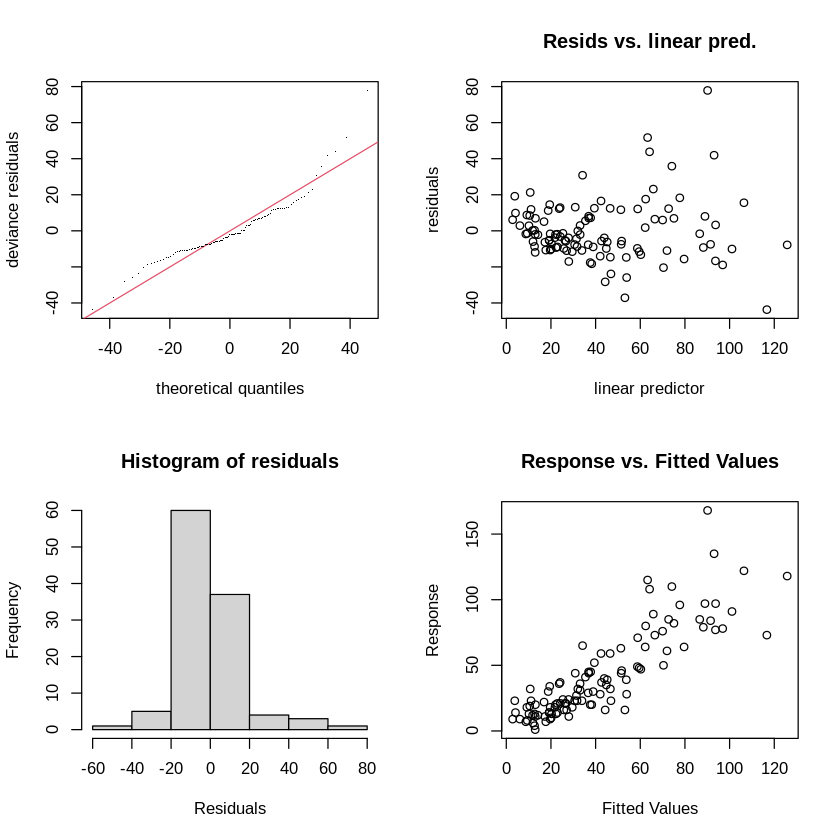


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 5 iterations.
The RMS GCV score gradient at convergence was 5.567617e-05 .
The Hessian was positive definite.
Model rank =  28 / 28 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                 k'  edf k-index p-value   
s(radiation)   9.00 2.76    0.96    0.22   
s(temperature) 9.00 3.84    0.79    0.01 **
s(wind)        9.00 2.92    0.96    0.28   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


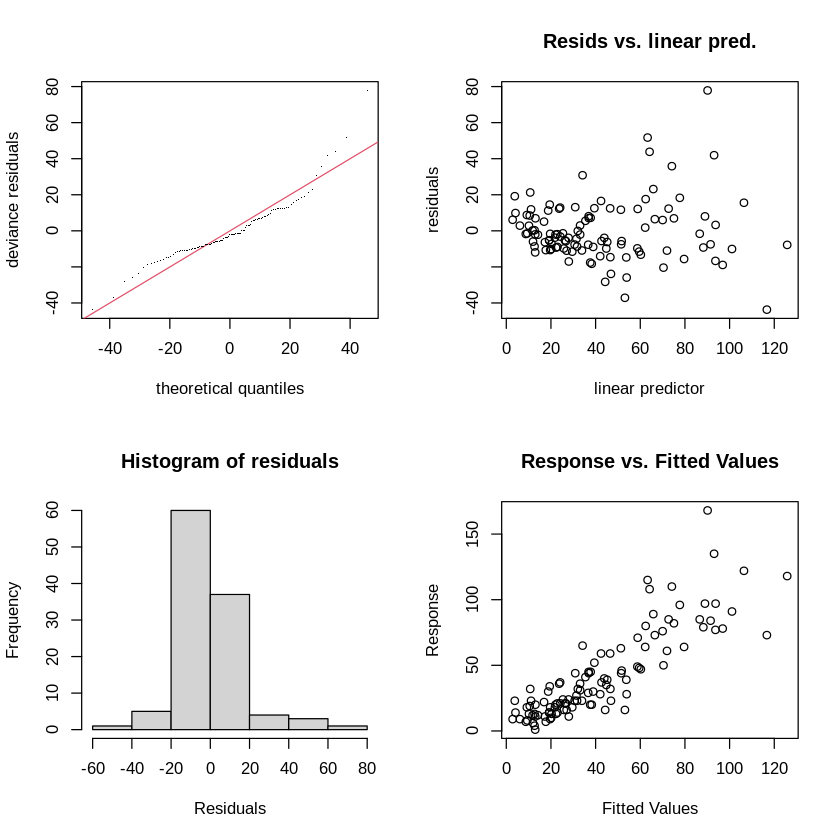

In [26]:
lm_model <- lm(ozone ~ radiation + temperature + wind, data = ozone_data)
lm_pred <- predict(lm_model, ozone_data)
lm_mse <- mse(ozone_data$ozone, lm_pred)
lm_adj_r2 <- summary(lm_model)$adj.r.squared
cv_ridge <- cv.glmnet(x, y, alpha = 0, type.measure = "mse", nfolds = 10)
cv_lasso <- cv.glmnet(x, y, alpha = 1, type.measure = "mse", nfolds = 10)
ridge_gcv <- cv_ridge$cvm[cv_ridge$lambda == cv_ridge$lambda.min]
lasso_gcv <- cv_lasso$cvm[cv_lasso$lambda == cv_lasso$lambda.min]
spline_model <- gam(ozone ~ s(radiation) + s(temperature) + s(wind), data = ozone_data)
additive_model <- gam(ozone ~ s(radiation) + s(temperature) + s(wind), data = ozone_data)
spline_gcv <- gam.check(spline_model)$gcv.ubre
additive_gcv <- gam.check(additive_model)$gcv.ubre
spline_adj_r2 <- summary(spline_model)$adj.r.sq
additive_adj_r2 <- summary(additive_model)$adj.r.sq
tree_model <- rpart(ozone ~ radiation + temperature + wind, data = ozone_data)
rf_model <- randomForest(ozone ~ radiation + temperature + wind, data = ozone_data, ntree = 50)
tree_pred <- predict(tree_model, ozone_data)
rf_pred <- predict(rf_model, ozone_data)
tree_mse <- mse(ozone_data$ozone, tree_pred)
rf_mse <- mse(ozone_data$ozone, rf_pred)


In [29]:
# Fit the models first
lm_model <- lm(ozone ~ radiation + temperature + wind, data = ozone_data)
cv_ridge <- cv.glmnet(x, y, alpha = 0, type.measure = "mse", nfolds = 10)
cv_lasso <- cv.glmnet(x, y, alpha = 1, type.measure = "mse", nfolds = 10)

# Ensuring we get the minimum GCV value correctly
ridge_gcv <- cv_ridge$cvm[which.min(cv_ridge$cvm)]
lasso_gcv <- cv_lasso$cvm[which.min(cv_lasso$cvm)]

# Check spline and additive models GCVs and ensure single values
spline_model <- gam(ozone ~ s(radiation) + s(temperature) + s(wind), data = ozone_data)
additive_model <- gam(ozone ~ s(radiation) + s(temperature) + s(wind), data = ozone_data)

# Typically gam.check returns an object with several diagnostics; extract GCV directly from model summary
spline_gcv <- summary(spline_model)$gcv.ubre
additive_gcv <- summary(additive_model)$gcv.ubre

# Calculate MSE for tree and random forest models
tree_model <- rpart(ozone ~ radiation + temperature + wind, data = ozone_data)
rf_model <- randomForest(ozone ~ radiation + temperature + wind, data = ozone_data, ntree = 50)
tree_pred <- predict(tree_model, ozone_data)
rf_pred <- predict(rf_model, ozone_data)
tree_mse <- mean((ozone_data$ozone - tree_pred)^2)
rf_mse <- mean((ozone_data$ozone - rf_pred)^2)

# Printing values to check
print(paste("LM Adjusted R2:", summary(lm_model)$adj.r.squared))
print(paste("Ridge GCV:", ridge_gcv))
print(paste("Lasso GCV:", lasso_gcv))
print(paste("Spline GCV:", spline_gcv))
print(paste("Additive GCV:", additive_gcv))
print(paste("Tree MSE:", tree_mse))
print(paste("RF MSE:", rf_mse))

# Create the results table if all checks are passed
if (all(sapply(list(summary(lm_model)$adj.r.squared, ridge_gcv, lasso_gcv, spline_gcv, additive_gcv, tree_mse, rf_mse), function(x) length(x) == 1))) {
    results_table <- data.frame(
      Model = c("Linear", "Ridge", "Lasso", "Spline", "Additive", "Tree", "Random Forest"),
      Adjusted_R_squared = c(summary(lm_model)$adj.r.squared, NA, NA, NA, NA, NA, NA),
      GCV = c(NA, ridge_gcv, lasso_gcv, spline_gcv, additive_gcv, NA, NA),
      MSE = c(NA, NA, NA, NA, NA, tree_mse, rf_mse)
    )
    print(results_table)
} else {
    print("Error in data lengths. Please check individual metrics.")
}


[1] "LM Adjusted R2: 0.595171318810855"
[1] "Ridge GCV: 474.838183228585"
[1] "Lasso GCV: 478.254051030358"
[1] "Spline GCV: "
[1] "Additive GCV: "
[1] "Tree MSE: 333.784794753545"
[1] "RF MSE: 79.2906137422585"
[1] "Error in data lengths. Please check individual metrics."


In [31]:
# To check the structure of the summary for correct element access
print(str(summary(spline_model)))


List of 28
 $ p.coeff      : Named num 42.1
  ..- attr(*, "names")= chr "(Intercept)"
 $ se           : Named num [1:28] 1.66 6.45 11.92 3.31 7.19 ...
  ..- attr(*, "names")= chr [1:28] "(Intercept)" "s(radiation).1" "s(radiation).2" "s(radiation).3" ...
 $ p.t          : Named num 25.4
  ..- attr(*, "names")= chr "(Intercept)"
 $ p.pv         : Named num 1.83e-45
  ..- attr(*, "names")= chr "(Intercept)"
 $ residual.df  : num 100
 $ m            : int 3
 $ chi.sq       : num [1:3(1d)] 13.7 55.3 50.5
  ..- attr(*, "dimnames")=List of 1
  .. ..$ : chr [1:3] "s(radiation)" "s(temperature)" "s(wind)"
 $ s.pv         : num [1:3(1d)] 0.00859 0 0
 $ scale        : num 306
 $ r.sq         : num 0.724
 $ family       :List of 12
  ..$ family    : chr "gaussian"
  ..$ link      : chr "identity"
  ..$ linkfun   :function (mu)  
  ..$ linkinv   :function (eta)  
  ..$ variance  :function (mu)  
  ..$ dev.resids:function (y, mu, wt)  
  ..$ aic       :function (y, n, mu, wt, dev)  
  ..$ mu.eta   

In [33]:
ozone <- read.csv("/content/stat444-data.csv")


In [35]:
if (!require(knitr)) install.packages("knitr")
library(knitr)


Loading required package: knitr



In [37]:
library(glmnet)
library(splines)
library(mgcv)
library(rpart)
library(randomForest)

# Define a function to calculate the GCV score
gcv_score <- function(y, yhat, p) {
  n <- length(y)
  mean((y - yhat)^2 / (1 - p/n)^2)
}

# Define a function to calculate the adjusted R-squared value
adj_r_squared <- function(model, X, y) {
  yhat <- predict(model, newx = X)
  SST <- sum((y - mean(y))^2)
  SSE <- sum((y - yhat)^2)
  p <- ncol(X)  # Number of predictors
  n <- length(y)  # Number of observations
  1 - (SSE / (n - p - 1)) / (SST / (n - 1))
}

# Prepare the data
X <- model.matrix(ozone ~ radiation + temperature + wind, data = ozone)[,-1]
y <- ozone$ozone

# Linear Model
lm_model <- lm(ozone ~ radiation + temperature + wind, data = ozone)
lm_predictions <- predict(lm_model)
lm_mse <- mean((y - lm_predictions)^2)
lm_gcv <- gcv_score(y, lm_predictions, ncol(X) + 1)  # +1 for intercept
lm_adj_r2 <- summary(lm_model)$adj.r.squared

# Ridge Regression
ridge_model <- cv.glmnet(X, y, alpha = 0)
lambda_ridge <- ridge_model$lambda.min
ridge_predictions <- predict(ridge_model, newx = X, s = lambda_ridge)
ridge_mse <- mean((y - ridge_predictions)^2)
ridge_gcv <- gcv_score(y, ridge_predictions, ncol(X))  # No intercept
ridge_adj_r2 <- adj_r_squared(ridge_model, X, y)

# Lasso Regression
lasso_model <- cv.glmnet(X, y, alpha = 1)
lambda_lasso <- lasso_model$lambda.min
lasso_predictions <- predict(lasso_model, newx = X, s = lambda_lasso)
lasso_mse <- mean((y - lasso_predictions)^2)
lasso_gcv <- gcv_score(y, lasso_predictions, ncol(X))  # No intercept
lasso_adj_r2 <- adj_r_squared(lasso_model, X, y)

# Spline Model
spline_model <- lm(ozone ~ ns(radiation, df = 4) + ns(temperature, df = 4) + ns(wind, df = 4), data = ozone)
spline_predictions <- predict(spline_model)
spline_mse <- mean((y - spline_predictions)^2)
spline_gcv <- gcv_score(y, spline_predictions, ncol(model.matrix(spline_model)))  # Including spline basis functions
spline_adj_r2 <- summary(spline_model)$adj.r.squared

# Additive Model
gam_model <- gam(ozone ~ s(radiation) + s(temperature) + s(wind), data = ozone)
gam_predictions <- predict(gam_model)
gam_mse <- mean((y - gam_predictions)^2)
gam_gcv <- gcv_score(y, gam_predictions, ncol(X))  # Approximation
gam_adj_r2 <- summary(gam_model)$r.sq  # Note: GAM models don't have an adjusted R-squared directly available

# Decision Tree Model
tree_model <- rpart(ozone ~ radiation + temperature + wind, data = ozone)
tree_predictions <- predict(tree_model)
tree_mse <- mean((y - tree_predictions)^2)
tree_gcv <- mean((y - tree_predictions)^2)  # Using MSE as an approximation
tree_adj_r2 <- 1 - (mean((y - tree_predictions)^2) / var(y))


# Random Forest Model
rf_model <- randomForest(ozone ~ radiation + temperature + wind, data = ozone, ntree = 500)
rf_predictions <- predict(rf_model, newdata = ozone)
rf_mse <- mean((y - rf_predictions)^2)
rf_gcv <- mean((y - rf_predictions)^2)  # Using MSE as an approximation
rf_adj_r2 <- 1 - (mean((y - rf_predictions)^2) / var(y))  # Approximation of Adjusted R-squared

# Compile the results
# Compile the results into a data frame
results <- data.frame(
  Model = c("Linear", "Ridge Regression", "Lasso Regression", "Spline", "Additive", "Tree", "Random Forest"),
  Prediction_Error = c(lm_mse, ridge_mse, lasso_mse, spline_mse, gam_mse, tree_mse, rf_mse),
  GCV = c(lm_gcv, ridge_gcv, lasso_gcv, spline_gcv, gam_gcv, tree_gcv, rf_gcv),
  Adjusted_R_Squared = c(lm_adj_r2, ridge_adj_r2, lasso_adj_r2, spline_adj_r2, gam_adj_r2, tree_adj_r2, rf_adj_r2),
  stringsAsFactors = FALSE  # Ensure that text columns are treated as text
)
if (!require(kableExtra)) install.packages("kableExtra")
library(kableExtra)

# Enhanced table styling
knitr::kable(results, format = "html", caption = "Summary of Model Performances") %>%
  kableExtra::kable_styling(bootstrap_options = c("striped", "hover", "condensed", "responsive"))

# Print the results table with nicer formatting
knitr::kable(results, format = "markdown", caption = "Summary of Model Performances")



Loading required package: kableExtra

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘kableExtra’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘svglite’




<table class="table table-striped table-hover table-condensed table-responsive" style="margin-left: auto; margin-right: auto;">
<caption>Summary of Model Performances</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> Model </th>
   <th style="text-align:right;"> Prediction_Error </th>
   <th style="text-align:right;"> GCV </th>
   <th style="text-align:right;"> Adjusted_R_Squared </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Linear </td>
   <td style="text-align:right;"> 432.10917 </td>
   <td style="text-align:right;"> 465.02027 </td>
   <td style="text-align:right;"> 0.5951713 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Ridge Regression </td>
   <td style="text-align:right;"> 433.29726 </td>
   <td style="text-align:right;"> 457.70367 </td>
   <td style="text-align:right;"> 0.4995825 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Lasso Regression </td>
   <td style="text-align:right;"> 433.62137 </td>
   <td style="text-align:right;



Table: Summary of Model Performances

|Model            | Prediction_Error|       GCV| Adjusted_R_Squared|
|:----------------|----------------:|---------:|------------------:|
|Linear           |        432.10917| 465.02027|          0.5951713|
|Ridge Regression |        433.29726| 457.70367|          0.4995825|
|Lasso Regression |        433.62137| 458.04603|          0.4834381|
|Spline           |        272.67331| 349.81339|          0.7210810|
|Additive         |        276.95865| 292.55894|          0.7236839|
|Tree             |        333.78479| 333.78479|          0.6985570|
|Random Forest    |         80.29323|  80.29323|          0.9274867|